## LIbraries and dataset Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [21]:
df = pd.read_csv('../dataset/KAG_energydata_complete.csv')

## Preliminary EDA

Check for Missing values

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Understand data types

In [ ]:
print(df.dtypes)

## Modifying the date type

Change date type to date

In [23]:
df['date'] = pd.to_datetime(df['date'])

Set date as index, to make it easier to work with time series

In [24]:
df.set_index('date', inplace=True)

## Descriptive statistics

In [ ]:
#The stats for the whole dataset
summary_stats = df.describe()
print(summary_stats)

Plot the distributions of the Appliances and Lights variables

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['Appliances'], bins=50, kde=True)
plt.title('Distribution of Appliances Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['lights'], bins=50, kde=True)
plt.title('Distribution of Lights Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.show()

## Add features

Add the hour, day_of_week and month to the dataset as individual columns for Seasonal trend analysis

In [25]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

## Time Series Analysis

Plot the Energy Consumption Over Time

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Appliances'], label= 'Appliances Energy Consumption')
plt.plot(df.index, df['lights'], label= 'Lights Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption Over Time')
plt.legend()
plt.grid(True)
plt.show()

Plot for hourly Energy Consumption

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='hour', y='Appliances', data=df)
plt.title('Appliances Energy Consumption By Hour')
plt.xlabel('Hour Of The Day')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

Plot for daily Energy Consumption

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='day_of_week', y='Appliances', data=df)
plt.title('Appliances Energy Consumption By Day Of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

Plot for Monthly Energy Consumpion

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='month', y='Appliances', data=df)
plt.title('Appliances Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

## Correlation Analysis

Correlation Matrix

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

Scatter Plot for Temperature

Text(0.5, 1.0, 'Appliances Energy Consumption vs. T1')

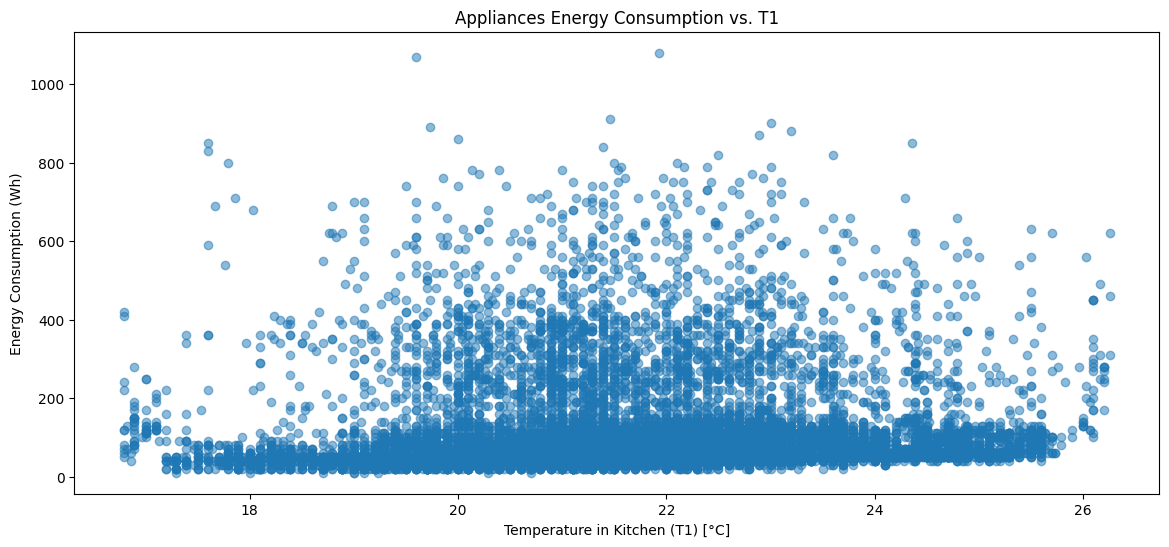

In [37]:
plt.figure(figsize=(14, 6))
plt.scatter(df['T1'], df['Appliances'], alpha=0.5)
plt.xlabel('Temperature in Kitchen (T1) [°C]')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption vs. T1')

Scatter Plot for Humidity

Text(0.5, 1.0, 'Appliances Energy Consumption vs. RH_1')

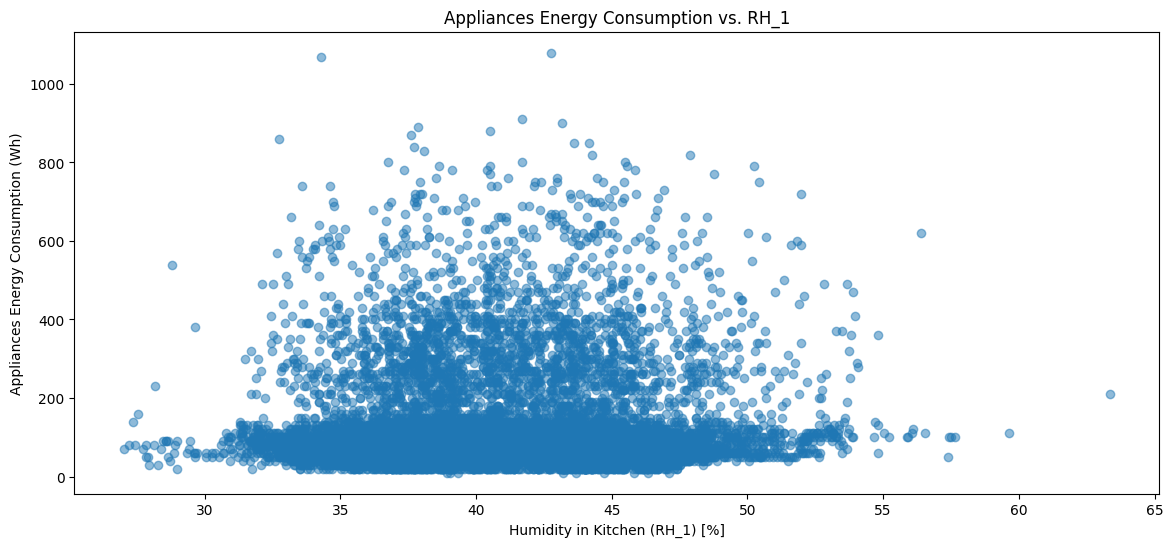

In [38]:
plt.figure(figsize=(14, 6))
plt.scatter(df['RH_1'], df['Appliances'], alpha=0.5)
plt.xlabel('Humidity in Kitchen (RH_1) [%]')
plt.ylabel('Appliances Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption vs. RH_1')